# Social Network Analysis : Ego Networks


## Introduction
In this lesson, we shall move on with our discussion around identifying communities and also identifying the central nodes in communities. So we are effectively mogving on from node centrality, community identification and now finding nodes of central importance in a community. This could be a challenging problem due to high level of randomness in social interaction networks (physical or on-line). We shall look at approach called the ISland method, and ego networks that make use of this approach. 

## Objectives

You will be able to:

- Understand and explain what the Island Method for finding important communities is 
- Identify Ego networks around specific individuals in a community
    

## The ISLAND Method

The "Island Method" is indeed an intuitive and simple technique for analyzing networks. It starts by Imagining the network as an __island__ with an uneven surface. The height of each surface point is defined by the value of a node attribute (centrality or other). Imagine if water level around this island rises, leaving portions of the island underwater, flooding all the valleys (low points - nodes with low centrality). The island thus splits into smaller islands (peaks that are still visible), revealing where the highest peaks are, and making these peaks smaller. Following figure reflects this behavior:

<img src="island.png" width=400>

If the water level keeps raiaing, the island will totally disappear. It is therefore imperative that this method is applied with care , just to raise the water level enough so that only peaks (important groups of nodes) remain visible. In terms of graphs, this means that the giant component gets split up into smaller components, and areas with the strongest amount of interaction between nodes (shown by weights) become components that can be analyzed separately.

Let's see this in action with a twitter dataset. We shall focus at some retweets to identify the peak (centrak node) or the person who is being retweeted and also the community who is closest to this node nbased on how much they retweet (edge weight)


## The Twitter Revolution

Let's consider the revolution in Egypt during Arab spring. We have a dataset for Egypt here, with the Twitter traffic over February 24-25, 2011, the evening oh Husni Mubarak's resignation (re-tweets only). So naturally a number of people a retweeting about the news news of his resignation. We'll see how we can identify important retweeting communities from this data below. Let's first read in the dataset as a graph and see what it contains. 

In [9]:
import networkx as nx
e=nx.read_pajek("retweets.txt")
print(nx.info(e))
print ('Connected Components:', len(list(nx.connected_component_subgraphs(e))))

Name: NetworkX
Type: MultiGraph
Number of nodes: 25178
Number of edges: 32785
Average degree:   2.6043
Connected Components: 3122


So the retweet network contains around 25,000 nodes, but the network is split into over 3,000 component subgraphs. Let us now study how these component sizes are distributed:

In [10]:
[len(c) for c in list(nx.connected_component_subgraphs(e)) if len(c) > 10]

[17762, 64, 16, 13, 11, 11, 14, 16]

So that there is one giant component of size 17,000 +, 7 components of size  less than 100, and nothing in between. The giant component can be further  split up into smaller components, and areas with the strongest amount of re-tweet activity  become their own components that can be analyzed separately.

Following simulation for island method is a function to virtually raise the water level. The takes a graph, and applies a threshold (“water level”) to Drown certain components and retain the rest. 

In [11]:
# The Island method Implementation 

def trim_edges(g, weight=1):
        '''
        Trim the graph after raising levels
        '''
        g2=nx.Graph()
        for f, to, edata in g.edges(data=True):
                if edata['weight'] > weight:                    
                    g2.add_edge(f,to,weight = edata['weight'])
        return g2
    
def island_method(g, iterations=5):
    
    '''
    Raise the water level according to given threshold, for given iterations
    Compute evenly spaced thresholds and produce a list of networks at each water level:
    '''
    weights= [edata['weight'] for f,to,edata in g.edges(data=True)]
    minimum=int(min(weights))
    maximum=int(max(weights))
    step=int((maximum-minimum)/iterations)

    return [[threshold, trim_edges(g, threshold)] for threshold in range(minimum,maximum,step)]

Above function will return a list of graph objects i.e. islands, each corresponding to a specific water level.

We can now split the biggest component of the Egypt Retweet Network, and separate it into subparts using the island method:

In [12]:
largest_component=list(nx.connected_component_subgraphs(e))[0]

islands=island_method(largest_component)

for i in islands:

    # print the threshold level, size of the graph, and number of connected components
    print (i[0], len(i[1]), len(list(nx.connected_component_subgraphs(i[1]))))

1 12360 314
62 27 11
123 8 3
184 5 2
245 5 2


Great. We can see that when all links with a value of 1 (single retweets) are eliminated, the network splits into 314 islands, each representing a group of people retweeting repeatedly from each other, thus having having strong relationships. 

with thresholding 62 (62 repeat retweets for each pair of nodes) reveals that there are only 27 nodes , in 11 islands. These people most probably involved in the  resistance or journalists covering the news !

So it is trial and error with some guess work, but a well-tuned “water level” can yield a very meaningful analysis.

## Ego Networks

Ego networks consist of a focal node ("ego") and the nodes to whom ego is directly connected to (these are called "alters") plus the ties, if any, among the alters. Each alter in an ego network has his/her own ego network, and all ego networks interlock to form The human social network.
![](ego2.jpg)

Egos and alters are tied to each other by social relations. There are various kinds of social relations, including:
![](ego3.jpg)


## Ego Network Data Structures

### Person-based and relation-based strategy
The person-based strategy uses a set of open-ended questionnaire items known as a name generator. Typically, it is unlimited in scope: the respondent may name anyone from any sphere of life: neighbors, kin, friends, coworkers, etc. After obtaining a large list of names, the interviewer typically goes over each name, asking the respondent about the nature of their relationship with that person (what social relation) and asking about attributes of that person (sex, race, income, etc.). When possible, this is then followed by asking the respondent to indicate relationships among the alters.

### Relation-based strategy 
This starts with a relation of interest, such as emotional support, and then asks all the people that the respondent has this particular relationship with. Sometimes this is within the context of a circumscribed group, such as "which of your fellow employees to obtain emotion support from?". If appropriate this is then followed by attributes of the tie, such as duration, intensity, frequency, strength, and so on. If the relation is friendship, might ask strength and duration, but not frequency. If the relation is interacts with, might ask frequency and tenure of the relationship. Attributes of the alters can also be asked.

It should be obvious that random sampling of egos from a large pop will not form a network: it is likely that no ego mentions an alter that is another ego or is an alter of another ego. Hence, certain network measures cannot be obtained from ego network data, such as the number of links that separate people.



![](ego4.png)

Above, we see the problem of automatically discovering an author’s academic circles. In particular, given a single author with her co-authorship network, our goal is to identify her circles, each of which is a subset of her coauthors. 
Example above shows ego-networks from three citation zones. Individual nodes have different colors corresponding to different areas of research. If the color of all the nodes in a circle is same as the color of the circle, the value of homogeneity is 1. Time period  associated with each circle indicates that the ego has written a paper first time with anyone of its constituent coauthors at year.

### Extracting Ego Networks

Extraction of ego networks is quite simple as networkX provides a ready made function to do the job. Let's look at this example below about people who  were re-tweeting Justin Bieber related information on the eve of revolution.

The `ego_graph` function returns a networkx graph object, and all the usual metrics (degree, betweenness, etc.,) can be computed on it.

14


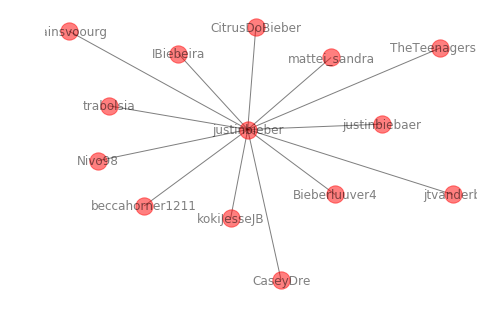

In [13]:
bieber = nx.ego_graph(largest_component,'justinbieber')
nx.draw(bieber, with_labels=True, alpha =0.5)

print(len(list(nx.ego_graph(largest_component,'justinbieber'))))

Let us now explore a celebrity of a different kind "Wael Ghonim", the face of the new generation of Egyptians, a Google executive, and a prolific tweeter. 

730


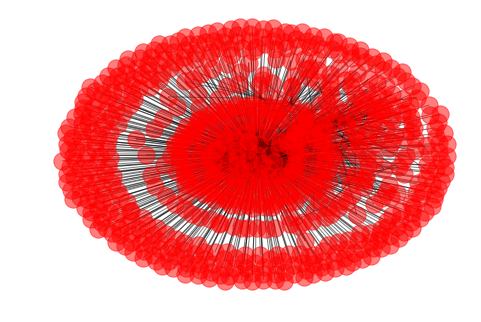

In [14]:
ghonim= nx.ego_graph(largest_component,'Ghonim')
nx.draw(ghonim, alpha =0.5)

print(len(list(nx.ego_graph(largest_component,'Ghonim'))))

Wael Ghonim have a vastly larger retweet network (despite having fewer followers than Bieber).

## Clustering Co-efficient

Another metric for identifying important communities is called clustering coefficient, which measures the proportion of your friends that are also friends with each other (i.e., what amount of mutual trust people have for each other). This metric can be applied to entire networks but in a large network with widely varying        densities and multiple cores, average clustering is difficult to interpret. In ego networks, the interpretation is simple dense ego networks with a lot of mutual trust have a high clustering coefficient.
![](cc.png)

In [15]:
bieber = nx.Graph(nx.ego_graph(largest_component,'justinbieber', radius=2))
ghonim = nx.Graph(nx.ego_graph(largest_component,'Ghonim', radius=2))

nx.average_clustering(ghonim), nx.average_clustering(bieber)

(0.043322544756993105, 0.12727272727272726)

Bieber's clustering coefficient shows that he is a pure broadcaster and is not embedded in a trust network of fans or, at least, he is not in a trust network that cares about world politics. Wael Ghonim have a vastly larger retweet network (despite having fewer followers than Bieber), his ego network is a network of trust where people retweet messages from him and from each other.

In our following lab, we shall look into these concepts into more detail and build a recommendation system according to the relationships that we can find in a bipartite graph. 

## Additional Resources
- http://en.cnki.com.cn/Article_en/CJFDTOTAL-QBLL201606010.htm
- http://faculty.ucr.edu/~hanneman/nettext/C9_Ego_networks.html
- https://www.geeksforgeeks.org/clustering-coefficient-graph-theory/

## Summary 
In this lesson we looked at the ego networks for identifying the central characters in a large social network. We looked at the island method and developed an intuition around raising the thresholds and trimming the data based on the new decision levels. NExt We shall apply this approach towards developing a Recommendation System for Amazon.  